In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ODE Palooza

Y'all have worked with several different ODEs. We've learned that we can use phase space to investigate different potential families of solutions. We've learned how to read information from phase space for systems we are familiar with like a falling ball and the SHO. We've also learned how to use numerical integration to find trajectories of the system in time and in phase space. Today, you will investigate a new model.

Models:

1. The Damped Pendulum: $m\ddot{x} + b\dot{x} + kx = 0$ (Solved by unexplored below)
2. Anharmonic Oscillator (Symmetric) $m\ddot{x} + b\dot{x} + k_1 x + k_2 x^3 = 0$
3. Pursuit model: $\dot{A} = aA +bB; \dot{B} = cA+dB$
4. Double Well Potential: $\ddot{x} = x-x^3$
5. Van Der Pol Oscillator: $\dot{x}=y; \dot{y} = -x+y(1-x^2)$
6. Dipole Oscillator: $\dot{x} = 2xy; \dot{y} = y^2 - x^2$
6. Duffing Oscillator: $\ddot{x} + x + \epsilon x^3=0$

In [2]:
def EC(y_arr, vy_arr, deltat, *args):
    '''EC performs an Euler Cromer integration for the model
    placed in the main loop. There are several checks in place
    to make sure that EC has what it needs before running.
    Think about these kinds fo checks when doing your work.
    
    We use argv to pass variable arguments to the derivative solver'''
    
    ## Make sure the arrays are clean and zeroed out to start 
    ## but we preserve any initial conditions that were set

    y0 = y_arr[0]
    vy0 = vy_arr[0]
    
    y_arr = np.zeros(len(y_arr))
    vy_arr = np.zeros(len(vy_arr))
    
    y_arr[0] = y0
    vy_arr[0] = vy0
    
    ## Another check: Make sure the arrays are the same size; else stop and raise error

    if len(y_arr) == len(vy_arr):
        
        ## Let's store the length of everything now that we know everything is the same length
        N = len(y_arr)
        
        ## We create the time array now and return it, there's no need to worry about that before now
        t_arr = np.linspace(0, N*deltat, N)
        
        ## The core of the EC algorithm
        ## For each point starting with the first and going to the last
        ## calculate the changes to the location and velocity 
        ## Add those changes to the original value and
        ## store that in the very next position in the arrays
        ## REPEAT UNTIL DONE
        
        for i in np.arange(0,len(y_arr)-1):
            
            ## ONLY THING CHANGED!!!!!
            dy_dt, dvy_dt = DeriveModel2ndOrder(y_arr[i], vy_arr[i], args)
            
            y_arr[i+1], vy_arr[i+1] = y_arr[i]+dy_dt*deltat, vy_arr[i]+dvy_dt*deltat
         
        ## Give us all that information we worked so hard for   
        return t_arr, y_arr, vy_arr
        
    else:
        
        print('Error: arrays mismatch size')

def RK2(y_arr, vy_arr, deltat, *args):
    '''RK2 performs an 2nd order Runge Kutta integration for the model
    placed in the main loop. There are several checks in place
    to make sure that RK2 has what it needs before running.
    Think about these kinds fo checks when doing your work.'''
    
    ## Make sure the arrays are clean and zeroed out to start 
    ## but we preserve any initial conditions that were set

    y0 = y_arr[0]
    vy0 = vy_arr[0]
    
    y_arr = np.zeros(len(y_arr))
    vy_arr = np.zeros(len(vy_arr))
    
    y_arr[0] = y0
    vy_arr[0] = vy0
    
    ## Another check: Make sure the arrays are the same size; else stop and raise error

    if len(y_arr) == len(vy_arr):
        
        ## Let's store the length of everything now that we know everything is the same length
        N = len(y_arr)
        
        ## We create the time array now and return it, there's no need to worry about that before now
        t_arr = np.linspace(0, N*deltat, N)
        
        
        ## The core of the RK algorithm
        ## For each point starting with the first and going to the last
        ## calculate the changes to the location and velocity 
        ## Add those changes to the original value and
        ## store that in the very next position in the arrays
        ## REPEAT UNTIL DONE
        
        for i in np.arange(0,len(y_arr)-1):
            
            ## It's two steps now
            k1_y, k1_vy = DeriveModel2ndOrder(y_arr[i], vy_arr[i], args)
            k1_y, k1_vy = k1_y*deltat, k1_vy*deltat   ## DONT FORGET THE DELTAT FOR THESE LIKE I DID FOR AN HOUR!!!!
            
            k2_y, k2_vy = DeriveModel2ndOrder(y_arr[i]+0.5*k1_y, vy_arr[i]+0.5*k1_vy, args)
            
            y_arr[i+1], vy_arr[i+1] = y_arr[i]+k2_y*deltat, vy_arr[i]+k2_vy*deltat
         
        ## Give us all that information we worked so hard for   
        return t_arr, y_arr, vy_arr
        
    else:
        
        print('Error: arrays mismatch size')
        
def RK4(y_arr, vy_arr, deltat, *args):
    '''RK4 performs an 4th order Runge Kutta integration for the model
    placed in the main loop. There are several checks in place
    to make sure that RK4 has what it needs before running.
    Think about these kinds fo checks when doing your work.'''
    
    ## Make sure the arrays are clean and zeroed out to start 
    ## but we preserve any initial conditions that were set

    y0 = y_arr[0]
    vy0 = vy_arr[0]
    
    y_arr = np.zeros(len(y_arr))
    vy_arr = np.zeros(len(vy_arr))
    
    y_arr[0] = y0
    vy_arr[0] = vy0
    
    ## Another check: Make sure the arrays are the same size; else stop and raise error

    if len(y_arr) == len(vy_arr):
        
        ## Let's store the length of everything now that we know everything is the same length
        N = len(y_arr)
        
        ## We create the time array now and return it, there's no need to worry about that before now
        t_arr = np.linspace(0, N*deltat, N)
        
        
        ## The core of the RK algorithm
        ## For each point starting with the first and going to the last
        ## calculate the changes to the location and velocity 
        ## Add those changes to the original value and
        ## store that in the very next position in the arrays
        ## REPEAT UNTIL DONE
        
        for i in np.arange(0,len(y_arr)-1):
            
            ## It's four steps now
            k1_y, k1_vy = DeriveModel2ndOrder(y_arr[i], vy_arr[i], args)
            k1_y, k1_vy = k1_y*deltat, k1_vy*deltat   ## DONT FORGET THE DELTAT FOR THESE LIKE I DID FOR AN HOUR!!!!
            
            k2_y, k2_vy = DeriveModel2ndOrder(y_arr[i]+0.5*k1_y, vy_arr[i]+0.5*k1_vy, args)
            k2_y, k2_vy = k2_y*deltat, k2_vy*deltat   ## DONT FORGET THE DELTAT FOR THESE LIKE I DID FOR AN HOUR!!!!
            
            k3_y, k3_vy = DeriveModel2ndOrder(y_arr[i]+0.5*k2_y, vy_arr[i]+0.5*k2_vy, args)
            k3_y, k3_vy = k3_y*deltat, k3_vy*deltat   ## DONT FORGET THE DELTAT FOR THESE LIKE I DID FOR AN HOUR!!!!
            
            k4_y, k4_vy = DeriveModel2ndOrder(y_arr[i]+k3_y, vy_arr[i]+k3_vy, args)
            k4_y, k4_vy = k4_y*deltat, k4_vy*deltat   ## DONT FORGET THE DELTAT FOR THESE LIKE I DID FOR AN HOUR!!!!
            
            y_arr[i+1], vy_arr[i+1] = y_arr[i]+(1.0/6)*(k1_y+2*k2_y+2*k3_y+k4_y), vy_arr[i]+(1.0/6)*(k1_vy+2*k2_vy+2*k3_vy+k4_vy)
         
        ## Give us all that information we worked so hard for   
        return t_arr, y_arr, vy_arr
        
    else:
        
        print('Error: arrays mismatch size')
    

In [3]:
def DeriveModel2ndOrder(x, vx, *args):
    '''DeriveModel2ndOrder can be a general solver 
    where it takes an array of values for the DiffyQ
    and any arguments that you decide to use. Two examples appear below.
    
    Returns dx_dt and dvx_dt in that order'''
    
    ## Compute the changes; the notation is derviative of thing
    ## underscore with respect to variable, so dvy_dt means
    ## derivative of vy with respect to t
    model = 2
    
    if model == 1:
            
        ## SHO with g and l as parameters
        dvx_dt = -args[0][0]/args[0][1]*x  ## Here we make note that the order of the arguments matters
        dx_dt = vx

    elif model == 2:
        
        ## LAP with g and l as parameters
        dvx_dt = -args[0][0]/args[0][1]*np.sin(x) ## Here we make note that the order of the arguments matters
        dx_dt = vx
        
    
    ## Returns position change/dt then velocity change/dt
    return dx_dt, dvx_dt

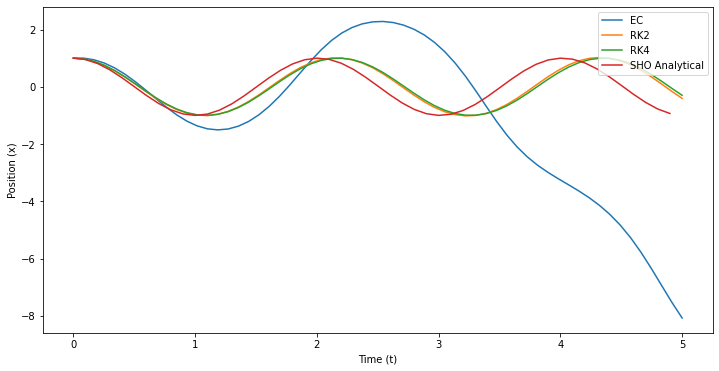

In [4]:
## Setup time

t0 = 0
tf = 5
N = 60
deltat = (tf-t0)/N

## Setup parameters (feel free to adjust)
g = 9.8
l = 1

## Create arrays for the anaylsis
x_arr_EC = np.zeros(N)
vx_arr_EC = np.zeros(N)
x_arr_RK2 = np.zeros(N)
vx_arr_RK2 = np.zeros(N)
x_arr_RK4 = np.zeros(N)
vx_arr_RK4 = np.zeros(N)

x0 = 1
vx0 = 0

x_arr_EC[0] = x0
x_arr_RK2[0] = x0
x_arr_RK4[0] = x0


## Run our code
t_arr_EC, x_arr_EC, vx_arr_EC = EC(x_arr_EC, vx_arr_EC, deltat, g, l, t0)
t_arr_RK2, x_arr_RK2, vx_arr_RK2 = RK2(x_arr_RK2, vx_arr_RK2, deltat,  g, l, t0)
t_arr_RK4, x_arr_RK4, vx_arr_RK4 = RK4(x_arr_RK4, vx_arr_RK4, deltat,  g, l, t0)


## Plot figures
fig = plt.figure(figsize=(12,6))

plt.plot(t_arr_EC,x_arr_EC, label='EC')
plt.plot(t_arr_RK2,x_arr_RK2, label='RK2')
plt.plot(t_arr_RK4,x_arr_RK4, label='RK4')

t = np.arange(0,5,0.1)
plt.plot(t, x0*np.cos(np.sqrt(g/l)*t), label='SHO Analytical')

plt.xlabel('Time (t)')
plt.ylabel('Position (x)')
plt.legend(loc=1)

In [10]:
from scipy.integrate import odeint

def dy(y, t, zeta, w0):
    
    x, p = y[0], y[1]
    
    dx = p
    dp = -2 * zeta * w0 * p - w0**2 * x
    
    return [dx, dp]

In [11]:
# initial state
y0 = [1.0, 0.0]

# time coodinate to solve the ODE for
t = np.linspace(0, 10, 1000)
w0 = 2*np.pi*1.0


In [12]:
# solve the ODE problem for three different values of the damping ratio

y1 = odeint(dy, y0, t, args=(0.0, w0)) # undamped
y2 = odeint(dy, y0, t, args=(0.2, w0)) # under damped
y3 = odeint(dy, y0, t, args=(1.0, w0)) # critial damping
y4 = odeint(dy, y0, t, args=(5.0, w0)) # over damped

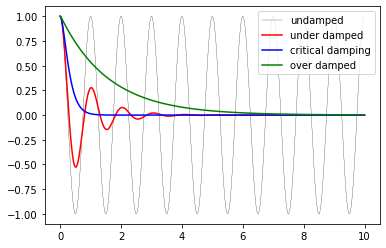

In [14]:
fig, ax = plt.subplots()
ax.plot(t, y1[:,0], 'k', label="undamped", linewidth=0.25)
ax.plot(t, y2[:,0], 'r', label="under damped")
ax.plot(t, y3[:,0], 'b', label=r"critical damping")
ax.plot(t, y4[:,0], 'g', label="over damped")
ax.legend(loc = 1);